# **🌟 Understanding MLP Memorization in Backpropagation 🌟**  

A **Multilayer Perceptron (MLP)** is a type of neural network that learns by adjusting weights using **backpropagation**. However, during training, it can sometimes **memorize** the training data instead of generalizing well. This is called **memorization** or **overfitting**.



## **🔹 What is MLP Memorization?**
When training an MLP, the model **should learn patterns** that can be applied to unseen data.  
However, if the MLP **memorizes** specific training examples instead of understanding the underlying patterns, it **fails to generalize** to new data.  

This happens when:
✅ The model is **too complex** (too many neurons & layers).  
✅ There is **too little training data**.  
✅ The model is **trained for too many epochs**.  

💡 **Memorization = Overfitting**  
A model that **memorizes** training data has **high accuracy on training data** but **poor accuracy on test data**.



## **🚀 How Does Memorization Happen in Backpropagation?**
Let’s break it down into **four steps**:

### **📌 Step 1: Forward Propagation (Making Predictions)**
- The MLP takes an input **X** and passes it through hidden layers.
- Each neuron applies weights **W** and biases **b** to compute **activations** using:  
  $$
  z = W \cdot X + b
  $$
- The activation function (ReLU, Sigmoid, etc.) transforms **z** into **a**:
  $$
  a = \text{activation}(z)
  $$

### **📌 Step 2: Compute Loss (Error Measurement)**
- The loss function (e.g., **MSE** for regression, **Cross-Entropy** for classification) measures how wrong the model is:
  $$
  \text{Loss} = \frac{1}{N} \sum (y_{\text{true}} - y_{\text{predicted}})^2
  $$

### **📌 Step 3: Backpropagation (Gradient Computation)**
- The model **computes gradients** of the loss w.r.t. weights:
  $$
  \frac{\partial \text{Loss}}{\partial W}
  $$
- The gradients tell **how much to update weights**.

### **📌 Step 4: Weight Update (Gradient Descent)**
- Weights **W** are updated using gradient descent:
  $$
  W_{\text{new}} = W_{\text{old}} - \eta \cdot \frac{\partial \text{Loss}}{\partial W}
  $$
- This process repeats for multiple **epochs**.



## **🔹 When Does Backpropagation Lead to Memorization?**
🔹 If the model **trains too long**, it **perfectly learns** the training data instead of generalizing.  
🔹 The loss on **training data goes to zero**, but the model **performs poorly on new data**.  
🔹 This is because the model **memorizes** noise and small details instead of learning general patterns.



## **📌 Example: Overfitting in an MLP (Memorization Effect)**
Let’s train an **MLP on the MNIST dataset** and see how memorization happens. 🚀  

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images
    Dense(512, activation='relu'),  # Large layer
    Dense(512, activation='relu'),  # Large layer
    Dense(10, activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 50 epochs (causing overfitting)
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
```

### **🔹 Observations:**
- The **training loss keeps decreasing**.
- But **validation loss starts increasing after some epochs** → **Memorization detected!**



## **🚀 How to Prevent Memorization?**
To stop an MLP from **memorizing**, we use **regularization techniques**.

### **✅ 1. Reduce Model Complexity**
Use **fewer neurons** and **fewer layers** to prevent excessive memorization.

```python
model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(128, activation='relu'),  # Fewer neurons
    Dense(64, activation='relu'),   # Fewer neurons
    Dense(10, activation='softmax') 
])
```



### **✅ 2. Use Dropout (Randomly Remove Neurons)**
Dropout **removes random neurons** during training, forcing the network to **learn generalized patterns**.

```python
from tensorflow.keras.layers import Dropout

model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer (50% neurons removed)
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') 
])
```



### **✅ 3. Use Early Stopping (Stop Before Overfitting)**
Stop training **automatically** when the validation loss starts increasing.

```python
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stop])
```



### **✅ 4. Use L2 Regularization (Prevent Large Weights)**
This prevents memorization by **penalizing large weight values**.

```python
from tensorflow.keras.regularizers import l2

model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax') 
])
```



## **🌟 Summary: Why is MLP Memorization a Problem?**
🔹 **Good Models** → Learn patterns and generalize well.  
🔹 **Overfitting Models** → Memorize training data and perform poorly on new data.  
🔹 **Memorization Happens** when:
   - The model is **too complex**.
   - The model trains **too long**.
   - The dataset is **too small**.

✅ **How to Fix It?**
- **Reduce model size** (fewer neurons/layers)
- **Use Dropout**
- **Apply Early Stopping**
- **Use Regularization (L2, L1)**

---

Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1821 - accuracy: 0.9441 - val_loss: 0.0884 - val_accuracy: 0.9714
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0802 - accuracy: 0.9753 - val_loss: 0.0789 - val_accuracy: 0.9764
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0534 - accuracy: 0.9829 - val_loss: 0.0884 - val_accuracy: 0.9735
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0720 - val_accuracy: 0.9777
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0331 - accuracy: 0.9891 - val_loss: 0.0762 - val_accuracy: 0.9798
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0318 - accuracy: 0.9903 - val_loss: 0.0815 - val_accuracy: 0.9772
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0250 - accuracy: 0.9927 - val_loss: 0.0889 - val_accuracy

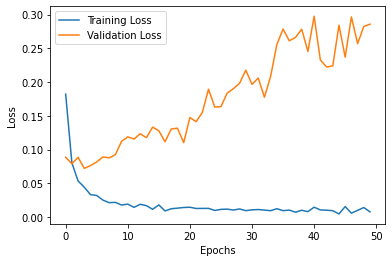

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images
    Dense(512, activation='relu'),  # Large layer
    Dense(512, activation='relu'),  # Large layer
    Dense(10, activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 50 epochs (causing overfitting)
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Sure! Let me break it down for you in a simple way.  

When training a neural network, these metrics help us understand how well the model is **learning** and **generalizing**.  



## **🔹 Understanding `loss`, `accuracy`, `val_loss`, and `val_accuracy`**

💡 The model is trained in **epochs** (full passes over the dataset). For each epoch, the neural network prints out:  

| Metric            | Meaning |
|------------------|------------------------------------------------|
| `loss`          | The model's error on the **training data**. |
| `accuracy`      | The percentage of correct predictions on the **training data**. |
| `val_loss`      | The model's error on the **validation data** (unseen data). |
| `val_accuracy`  | The percentage of correct predictions on the **validation data**. |



## **🚀 Example Breakdown**
Let’s analyze your training log:

```
Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1837 - accuracy: 0.9436 - val_loss: 0.0986 - val_accuracy: 0.9694
```

✅ **Epoch 1** (First pass over the training data):  
- **`loss: 0.1837`** → The error (difference between predicted and actual labels) on **training data**.  
- **`accuracy: 0.9436`** → The model correctly classified **94.36%** of training data.  
- **`val_loss: 0.0986`** → The error on **validation data** (lower is better).  
- **`val_accuracy: 0.9694`** → The model correctly classified **96.94%** of validation data.



```
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0789 - accuracy: 0.9751 - val_loss: 0.0810 - val_accuracy: 0.9744
```

✅ **Epoch 2** (Second pass over training data):  
- **`loss` decreased** from `0.1837 → 0.0789` (Good! Model is learning).  
- **`accuracy` increased** from `94.36% → 97.51%` (More correct predictions).  
- **`val_loss` decreased** from `0.0986 → 0.0810` (Model is improving on unseen data).  
- **`val_accuracy` increased** from `96.94% → 97.44%` (Generalization is good).



### **🔹 Key Insights**
1. **Lower `loss` is better** (it means the model's predictions are getting closer to the actual labels).  
2. **Higher `accuracy` is better** (more correct classifications).  
3. **If `loss` keeps decreasing but `val_loss` increases**, it means the model is **overfitting** (memorizing training data but failing on new data).  
4. **If `accuracy` is high but `val_accuracy` is much lower**, the model is struggling to generalize.  

---

No worries! Let me simplify it even more. Think of training a neural network like teaching a kid to recognize apples and oranges. 🍎🍊  

### **🔹 What are these terms?**
1. **Loss (`loss`)** – How much the kid is making mistakes while learning.  
   - A lower value means fewer mistakes.  

2. **Accuracy (`accuracy`)** – How often the kid gets the answer right while learning.  
   - A higher value means better learning.  

3. **Validation Loss (`val_loss`)** – How many mistakes the kid makes on a new test (unseen fruit).  
   - If this goes up, it means the kid is memorizing but not understanding.  

4. **Validation Accuracy (`val_accuracy`)** – How often the kid gets new test questions right.  
   - A high value means the kid can recognize apples and oranges in new situations.  



### **🔹 Example in Simple Terms**
🔹 **Epoch 1:**  
- **Loss: 0.1837** → The kid made **some mistakes** while learning.  
- **Accuracy: 94.36%** → The kid correctly identified **94.36% of apples and oranges**.  
- **Validation Loss: 0.0986** → On a new test, the kid made **fewer mistakes**.  
- **Validation Accuracy: 96.94%** → The kid got **96.94% of new test questions right**.  

🔹 **Epoch 2:**  
- **Loss drops to 0.0789** → The kid is making **even fewer mistakes**.  
- **Accuracy rises to 97.51%** → The kid is now **97.51% correct** on training data.  
- **Validation Loss drops to 0.0810** → The kid is making even fewer mistakes on new questions.  
- **Validation Accuracy rises to 97.44%** → The kid is now **97.44% correct on new tests**.  



### **🔹 Key Takeaway**
✅ **Lower loss = Fewer mistakes**  
✅ **Higher accuracy = More correct answers**  
✅ **Validation scores show how well the model works on new data**  

---

Your graph is a plot of **Training Loss vs. Validation Loss** over 50 epochs.

### **What does this graph represent?**
- **X-axis (Epochs):** Number of training iterations.
- **Y-axis (Loss):** The loss function value (how well or poorly the model is performing).
- **Two lines:**
  - **Training Loss (Blue Line by default in Matplotlib):** How the model performs on training data.
  - **Validation Loss (Orange Line by default in Matplotlib):** How the model generalizes to unseen test data.



### **What does your output specify?**
1. **Initially, both losses decrease:**  
   - This is expected because the model is learning patterns in the data.

2. **Training loss keeps decreasing, but validation loss starts increasing after some point:**  
   - This indicates **overfitting**. Your model is memorizing the training data but failing to generalize to unseen test data.

3. **Overfitting happens because of:**  
   - **Large model (512 neurons per layer)**: Too many parameters for a simple dataset like MNIST.  
   - **Too many epochs (50):** The model keeps learning even after generalization stops improving.



### **How to fix overfitting?**
1. **Reduce model complexity:**  
   - Try fewer neurons (e.g., `Dense(256, activation='relu')` instead of 512).
2. **Use dropout layers:**  
   - Add `Dropout(0.2)` between dense layers to randomly deactivate some neurons and prevent reliance on specific patterns.
3. **Use early stopping:**  
   - Stop training when validation loss starts increasing:
     ```python
     from tensorflow.keras.callbacks import EarlyStopping
     early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
     ```
     Then modify `model.fit()`:
     ```python
     model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])
     ```
4. **Reduce epochs:**  
   - Instead of 50, try `epochs=20` and see if validation loss stabilizes.



### **Summary of Your Graph:**
- Your model is **overfitting** after some epochs.
- Training loss is decreasing, but validation loss is increasing.
- You should try **dropout, early stopping, or reducing model complexity** to improve generalization.

---

## Using Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data Preparation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model Definition
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )
    
    def forward(self, x):
        return self.model(x)

model = ANN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 Regularization

# Training Loop
best_val_loss = float('inf')
patience = 3
patience_counter = 0
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(20):
    model.train()
    total_loss, correct, total = 0, 0, 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(correct / total)
    
    # Validation Loop
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.size(0), -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    val_losses.append(val_loss / len(test_loader))
    val_accuracies.append(correct / total)
    
    print(f"Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")
    
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Plot Results
epochs = len(train_losses)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Train Acc')
plt.plot(range(epochs), val_accuracies, label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()


Sure! I'll explain each part of the code so that it's easy to understand. This code is implementing a **fully connected neural network (ANN)** using PyTorch to classify handwritten digits from the **MNIST dataset**.  

---

## **📌 Breakdown of the Code**
---

### **1️⃣ Importing Required Libraries**
```python
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
```
- **torch** → The main PyTorch library.  
- **torch.nn** → Contains layers and loss functions to build a neural network.  
- **torch.optim** → Provides optimizers like Adam, SGD for training models.  
- **torchvision** → Contains popular datasets like MNIST, CIFAR, etc.  
- **torchvision.transforms** → Used for preprocessing (converting images to tensors & normalizing).  
- **torch.utils.data.DataLoader** → Helps load data in batches for training/testing.  
- **matplotlib.pyplot** → Used to plot graphs for loss and accuracy.  

---

### **2️⃣ Loading and Preprocessing Data**
```python
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
```
- **`transforms.ToTensor()`** → Converts image data (0 to 255) into tensors with values between 0 and 1.  
- **`transforms.Normalize((0.5,), (0.5,))`** → Normalizes pixel values to **[-1, 1]** for faster convergence.  
- **`torchvision.datasets.MNIST()`** → Loads the **MNIST dataset**.  
- **`DataLoader()`** → Helps **batch** the data (batch size = 64) and **shuffle** it for better training.  

---

### **3️⃣ Defining the Neural Network Model**
```python
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),  # Input layer (28x28 = 784 pixels) → Hidden layer (128 neurons)
            nn.ReLU(),  # Activation function
            nn.Dropout(0.2),  # Dropout to prevent overfitting
            nn.Linear(128, 128),  # Second hidden layer
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)  # Output layer (10 classes, one for each digit)
        )
    
    def forward(self, x):
        return self.model(x)
```
- This is a **fully connected feedforward neural network**.  
- **`nn.Linear(in_features, out_features)`** → Fully connected layer.  
- **`ReLU()`** → Activation function to introduce non-linearity.  
- **`Dropout(0.2)`** → Drops 20% of neurons randomly to reduce overfitting.  
- **The network structure:**  
  - **Input layer** → 784 neurons (since images are **28×28 pixels**).  
  - **2 Hidden layers** → Each has **128 neurons** with **ReLU activation**.  
  - **Output layer** → **10 neurons** (one for each digit **0-9**).  

---

### **4️⃣ Setting Up Device (CPU or GPU)**
```python
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
```
- Checks if **GPU (CUDA)** is available and moves the model to GPU if possible.
- If no GPU is available, it uses the **CPU**.

---

### **5️⃣ Defining the Loss Function & Optimizer**
```python
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 Regularization
```
- **Loss function:**  
  - We use **CrossEntropyLoss()** because it's a classification problem with multiple classes.  
- **Optimizer:**  
  - **Adam Optimizer** → Adjusts learning rates automatically to speed up training.  
  - **Learning rate = 0.001** (controls how fast the model learns).  
  - **Weight decay (1e-4)** → Helps prevent overfitting by adding **L2 regularization**.  

---

### **6️⃣ Training Loop**
```python
best_val_loss = float('inf')
patience = 3
patience_counter = 0
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
```
- **Early stopping** → Stops training if validation loss doesn't improve for **3 epochs**.  
- Lists (`train_losses`, `val_losses`, etc.) store loss & accuracy history for plotting.  

#### **Loop through epochs**
```python
for epoch in range(20):
    model.train()
    total_loss, correct, total = 0, 0, 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.size(0), -1)  # Flatten 28x28 images into 1D (784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
```
- **Loops over each batch** in `train_loader`.  
- **Flattens images** (28×28 → 784 pixels).  
- **Zero gradients** before backpropagation (`optimizer.zero_grad()`).  
- **Forward pass** → Get predictions (`outputs = model(images)`).  
- **Compute loss** (`criterion(outputs, labels)`).  
- **Backward pass & optimization** (`loss.backward()`, `optimizer.step()`).  
- **Compute accuracy** (compares predictions with actual labels).  

---

### **7️⃣ Validation Loop**
```python
model.eval()
val_loss, correct, total = 0, 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.size(0), -1)
        outputs = model(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
```
- **Disables gradient calculation** (`torch.no_grad()`) to save memory.  
- Computes **validation loss & accuracy** (no training updates).  

---

### **8️⃣ Early Stopping & Logging**
```python
print(f"Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, "
      f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")

if val_losses[-1] < best_val_loss:
    best_val_loss = val_losses[-1]
    patience_counter = 0
else:
    patience_counter += 1
    if patience_counter >= patience:
        print("Early stopping triggered.")
        break
```
- **Stops training early** if validation loss doesn't improve for **3 consecutive epochs**.  

---

### **9️⃣ Plot Training Results**
```python
epochs = len(train_losses)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Train Acc')
plt.plot(range(epochs), val_accuracies, label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()
```
- **Plots loss & accuracy curves** to visualize training progress.  

---

## **💡 Summary**
✅ Loads and preprocesses the MNIST dataset.  
✅ Defines a simple **ANN** with **2 hidden layers**.  
✅ Uses **Adam optimizer + L2 regularization** for training.  
✅ Implements **early stopping** to avoid overfitting.  
✅ Plots **loss & accuracy curves** for performance analysis.  

Let me know if you have any questions! 🚀